In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Set Up Data

In [1]:
data_dir = "../../data/cell_images"

In [3]:
os.listdir(data_dir)

['train', 'test']

In [5]:
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"

In [6]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [7]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [11]:
os.listdir(train_path + "parasitized")[0:5]

['C101P62ThinF_IMG_20150918_151942_cell_72.png',
 'C176P137NThinF_IMG_20151201_121303_cell_110.png',
 'C129P90ThinF_IMG_20151004_134636_cell_17.png',
 'C182P143NThinF_IMG_20151201_171950_cell_186.png',
 'C68P29N_ThinF_IMG_20150819_133447_cell_145.png']

In [12]:
# Let's check out a single image
os.listdir(train_path + "parasitized")[0]
para_cell = train_path + "parasitized/C101P62ThinF_IMG_20150918_151942_cell_72.png"

In [13]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
imread(para_cell).shape

(160, 148, 3)

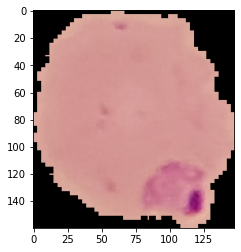

In [15]:
plt.imshow(imread(para_cell))

In [18]:
os.listdir(train_path+"uninfected")[0]
uninfected_cell = train_path + "uninfected/C107P68ThinF_IMG_20150924_222535_cell_84.png"

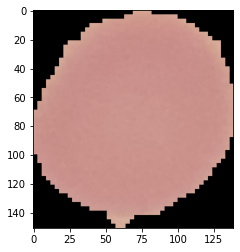

In [19]:
plt.imshow(imread(uninfected_cell))

In [21]:
print(len(os.listdir(train_path+"parasitized")))
print(len(os.listdir(train_path+"uninfected")))

12480
12480


In [22]:
# Image datasets do not always have same dimensions. To deal with that, we do the following

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+"uninfected"):
    img = imread(test_path+"uninfected/"+image_filename)

    d1,d2,colors = img.shape  # check image shape
    dim1.append(d1)           # record first dimension
    dim2.append(d2)           # record second dimension


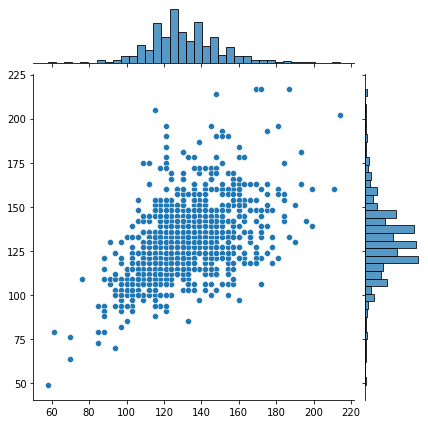

In [26]:
# We need to resize, so let's investigate the dimensions
sns.jointplot(x=dim1, y=dim2);

In [30]:
# looks like the mean values will suffice
print(np.mean(dim1),np.mean(dim2))

image_shape = (130, 130, 3)

130.92538461538462 130.75
